<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 12 – Feature Matching, Face Detection, Face Tracking

**Nama :** Muhamad Anang Abdullah Faqih

**Kelas :** D4 TI 3D

**NIM :** 2241720070

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

1. Melakukan face detection

In [18]:
def face_detection(img, scale_factor=1.1, min_neighbors=5, min_size=(30, 30)):
    haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')

    if len(img.shape) == 3:
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    else:
        img_gray = img.copy()

    if img_gray.dtype != 'uint8':
        img_gray = (img_gray * 255).astype('uint8')

    faces = haar_cascade.detectMultiScale(img_gray, scaleFactor=scale_factor, minNeighbors=min_neighbors, minSize=min_size)

    img_copy = img.copy()

    for (x, y, w, h) in faces:
        cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return img_copy

In [19]:
def show_image(img, img_with_bounding_box):
  plt.figure(figsize=(10, 10))

  plt.subplot(121)
  plt.imshow(img)
  plt.title('Gambar Asli')
  plt.axis('off')

  plt.subplot(122)
  plt.imshow(img_with_bounding_box)
  plt.title('Gambar Setelah Face Detection')
  plt.axis('off')

  plt.show()

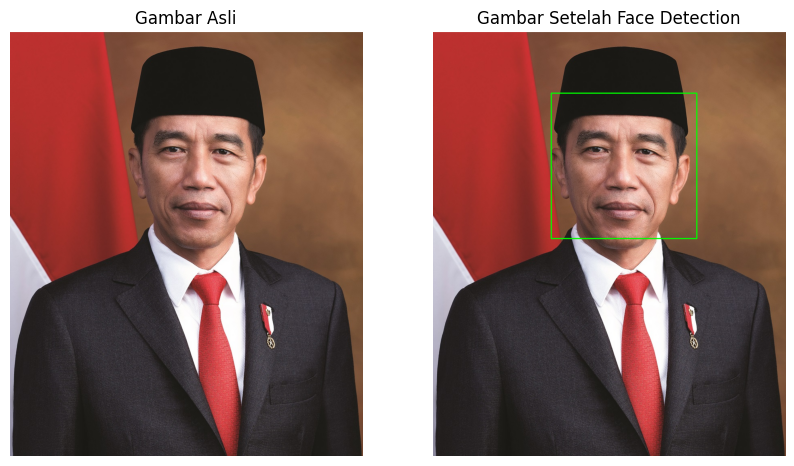

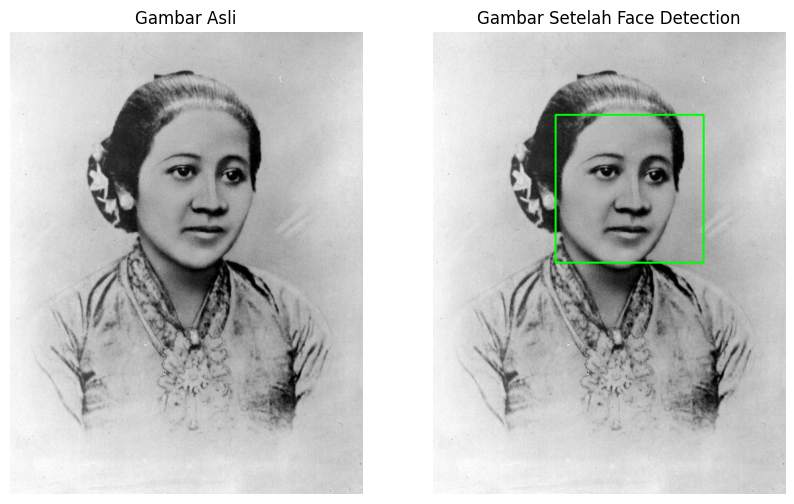

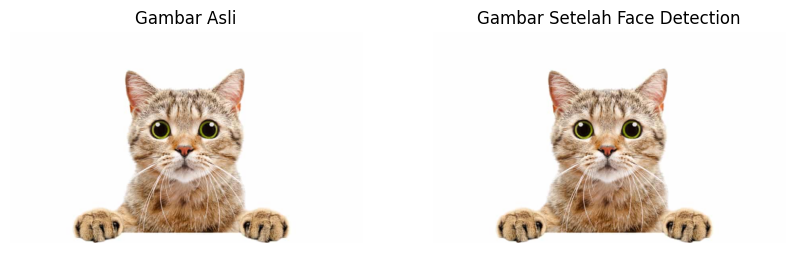

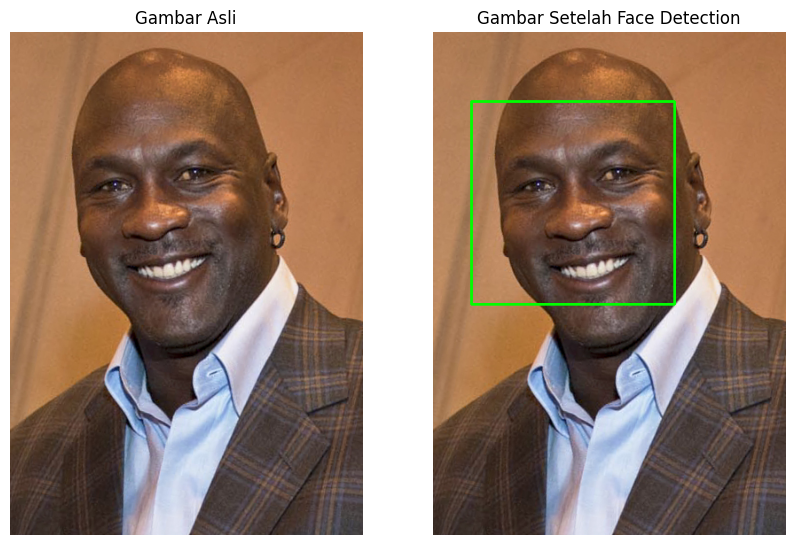

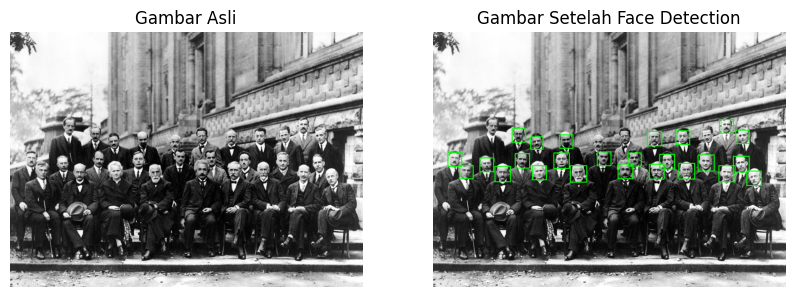

In [20]:
# Joko Widodo
img1 = plt.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
img_with_bounding_box1 = face_detection(img1)
show_image(img1, img_with_bounding_box1)

# RA Kartini
img2 = plt.imread('/content/drive/MyDrive/Images/facedet/kartini.jpg')
img_with_bounding_box2 = face_detection(img2)
show_image(img2, img_with_bounding_box2)

# Kucing
img3 = plt.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
img_with_bounding_box3 = face_detection(img3)
show_image(img3, img_with_bounding_box3)

# mjordan
img4 = plt.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
img_with_bounding_box4 = face_detection(img4)
show_image(img4, img_with_bounding_box4)

# solvayconf
img5 = plt.imread('/content/drive/MyDrive/Images/facedet/solvayconf.jpg')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img_with_bounding_box5 = face_detection(img5)
show_image(img5, img_with_bounding_box5)

Deteksi wajah kicomg

In [21]:
detector = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalcatface.xml')
img_cat = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
img_cat = cv.cvtColor(img_cat, cv.COLOR_BGR2RGB)
img_cat_face = detector.detectMultiScale(img_cat, scaleFactor=1.05, minNeighbors=10, minSize=(20, 20))

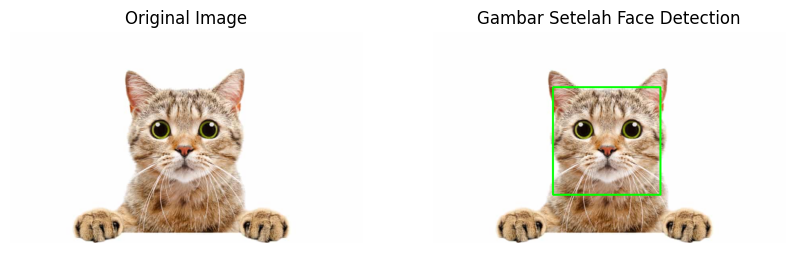

In [22]:
cat_copy = img_cat.copy()

if len(img_cat_face) > 0:
  largest_face = max(img_cat_face, key=lambda rect: rect[2] * rect[3])
  x, y, w, h = largest_face

  cv.rectangle(cat_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)
else:
  print("Tidak ada wajah yang terdeteksi")

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img_cat)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cat_copy)
plt.title('Gambar Setelah Face Detection')
plt.axis('off')

plt.show()

3. Eyes Detection

In [23]:
detector = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_eye.xml')
img_jokowi = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
img_jokowi = cv.cvtColor(img_jokowi, cv.COLOR_BGR2RGB)
eyes = detector.detectMultiScale(img_jokowi, scaleFactor=1.05, minNeighbors=10, minSize=(20, 20))

In [24]:
jokowi_copy = img_jokowi.copy()

for (x, y, w, h) in eyes:
  cv.rectangle(jokowi_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)

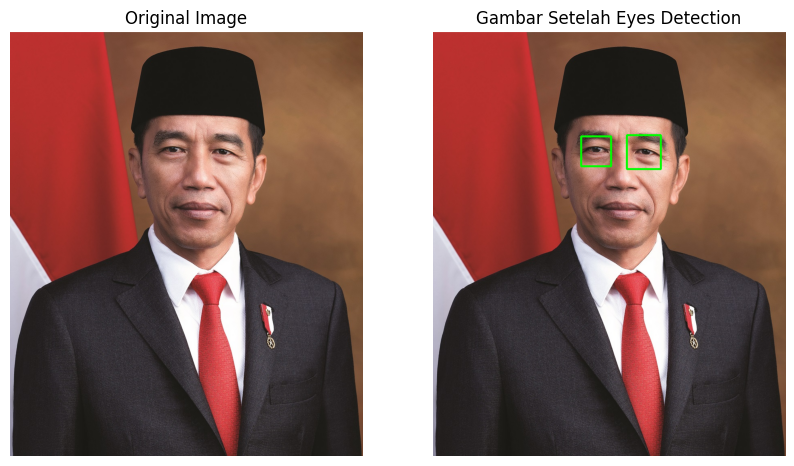

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img_jokowi)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(jokowi_copy)
plt.title('Gambar Setelah Eyes Detection')
plt.axis('off')

plt.show()

4. Face Tracking

In [26]:
from IPython.display import Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import io
import time
import PIL
import html

In [27]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')

In [28]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

In [29]:
def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [30]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

In [31]:
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [39]:
video_stream()

label_html = 'Capturing...'

bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])

    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

5. Bluring

In [40]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
img_jordan = plt.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
face = face_cascade.detectMultiScale(img_jordan, scaleFactor=1.05, minNeighbors=10, minSize=(20, 20))

In [41]:
jordan_copy = img_jordan.copy()

for (x, y, w, h) in face:
  face_img = img_jordan[y:y+h, x:x+w]
  blurred = cv.GaussianBlur(face_img, (11, 11), 30)
  jordan_copy[y:y+h, x:x+w] = blurred

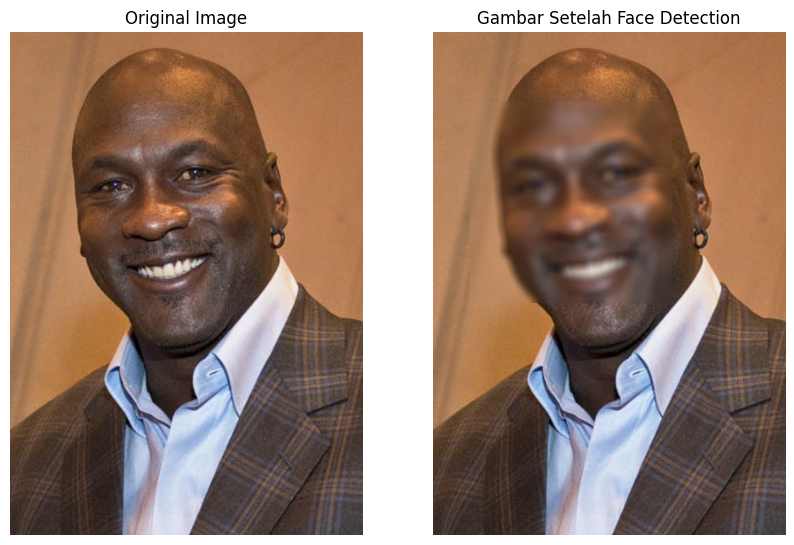

In [42]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img_jordan)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(jordan_copy)
plt.title('Gambar Setelah Face Detection')
plt.axis('off')

plt.show()

6. segmentasi KTP

In [43]:
face_casscade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
img_ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')
blured = img_ktp.copy()
gray = blured.copy()

In [44]:
img_ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')
blured = img_ktp.copy()
gray = blured.copy()

In [45]:
blured = cv.GaussianBlur(img_ktp, (5, 5), 0.5)
gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)

ret, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

165.0 (300, 493)


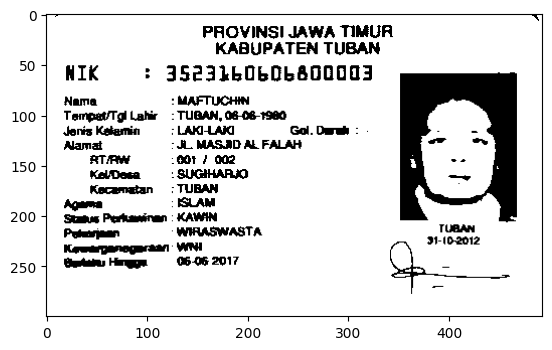

In [46]:
plt.imshow(bw, cmap='gray')

In [47]:
kernel = np.ones((2, 2), np.uint8)
morph_img = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

final_img = cv.bitwise_not(morph_img)

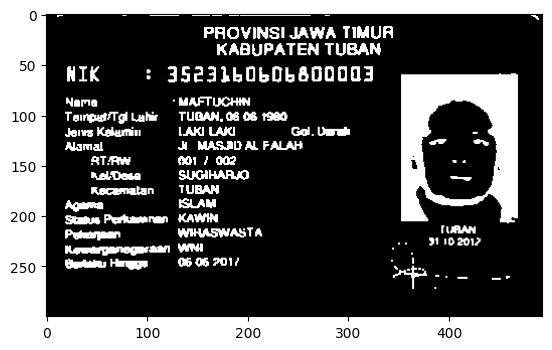

In [48]:
plt.imshow(final_img, cmap='gray')
plt.axis
plt.show()

In [64]:
contours, hierarchy = cv.findContours(final_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [69]:
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, 0.9)

output_img = img_ktp.copy()

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        cv.rectangle(output_img, (x, y), (x + w, y + h), (0, 0, 255), 1)

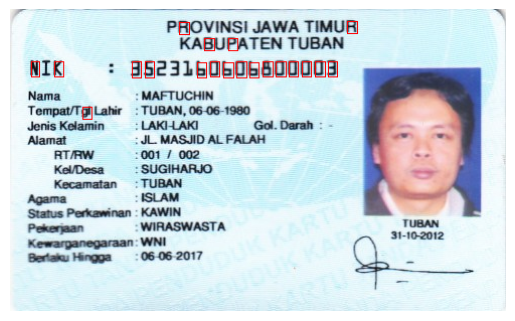

In [70]:
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [71]:
segmented_img = face_cascade.detectMultiScale(output_img, scaleFactor=1.05, minNeighbors=10, minSize=(30, 50))

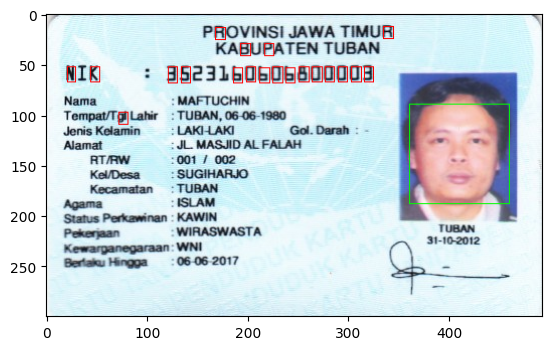

In [72]:
segmented_img_copy = output_img.copy()

for(x, y, w, h) in segmented_img:
  cv.rectangle(segmented_img_copy, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(cv.cvtColor(segmented_img_copy, cv.COLOR_BGR2RGB))
plt.show()

7.Cropped NIK

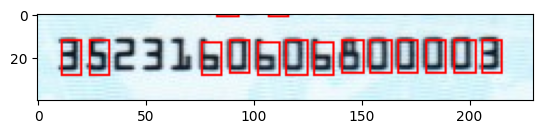

In [73]:
cropped_nik = segmented_img_copy[40:80, 110:340]
plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))

9. Deep Learning OCR

In [74]:
from tqdm import tqdm
import random
import pickle
import os

In [75]:
datadir = "/content/drive/MyDrive/ocr_dataset/training_data"

dirs = [char_name for char_name in os.listdir(datadir) if os.path.isdir(os.path.join(datadir, char_name))]
print(dirs)

['7', '4', '5', '6', '1', '2', '9', '3', '0', '8']


In [76]:
training_data = []
width, height = 100, 100

In [77]:
for char_name in dirs:
  path = os.path.join(datadir, char_name)
  class_num = dirs.index(char_name)

  for img in tqdm(os.listdir(path)):
    try:
      img_path = os.path.join(path, img)
      img_array = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
      new_array = cv.resize(img_array, (width, height))

      if new_array.shape != (height, width):
        print(f"Shape mismatch: {new_array.shape} for {img_path}")
        continue

      training_data.append([new_array, class_num])
    except Exception as e:
      print(f"Error processing {img_path}: {e}")
      pass

100%|██████████| 573/573 [00:13<00:00, 42.09it/s] 


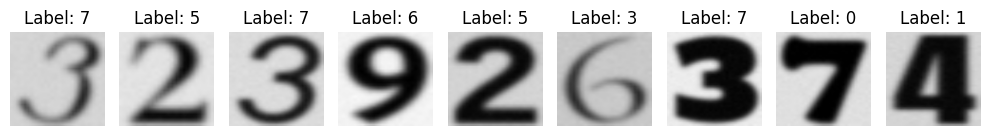

In [78]:
random.shuffle(training_data)
X = []
Y = []

for features, label in training_data:
  X.append(features)
  Y.append(label)

random_indices = random.sample(range(len(X)), 9)

fig, axes = plt.subplots(1, 9, figsize=(10, 10))

for ax, idx in zip(axes.flatten(), random_indices):
  ax.imshow(cv.cvtColor(X[idx], cv.COLOR_BGR2RGB))
  ax.set_title(f"Label: {Y[idx]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

In [79]:
X = np.array(X).reshape(-1, width, height, 1)

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [80]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [81]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

num_classes = len(np.unique(Y))
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

In [84]:
inputs = Input(shape=(width, height, 1))

conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)

In [85]:
flatten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)
outputs = Dense(num_classes, activation='softmax')(fc_layer)
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(X, Y, epochs=20, verbose=1)

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 126s 684ms/step - accuracy: 0.6536 - loss: 1.1460
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 155s 757ms/step - accuracy: 0.9814 - loss: 0.0672
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 131s 694ms/step - accuracy: 0.9850 - loss: 0.0578
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 144s 707ms/step - accuracy: 0.9956 - loss: 0.0199
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 160s 809ms/step - accuracy: 0.9959 - loss: 0.0155
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 200s 798ms/step - accuracy: 0.9973 - loss: 0.0094
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 121s 671ms/step - accuracy: 0.9997 - loss: 0.0021
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 120s 547ms/step - accuracy: 0.9979 - loss: 0.0068
Epoch 9/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 141s 545ms/step - accuracy: 0.9995 - loss: 0.0027
Epoch 10/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 109s 606ms/step - accuracy: 0.9961 - loss: 0.0111
Epoch 11/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 98s 546ms/step - accuracy: 1.0000 - loss: 6.2694e-04
Epoch

In [88]:
model.save('/content/drive/MyDrive/anpr.h5')

Testing

In [90]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from collections import Counter

In [91]:
datadir_testing = "/content/drive/MyDrive/ocr_dataset/testing_data"
dirs = []
width, height = 100, 100

In [92]:
model = tf.keras.models.load_model('/content/drive/MyDrive/anpr.h5')

In [93]:
for char_name in sorted(os.listdir(datadir_testing)):
  dirs.append(char_name)

In [95]:
true_labels = []
predicted_labels = []

In [96]:
for car in sorted(os.listdir(datadir_testing)):
  temp = ""

  for char_img in sorted(os.listdir(os.path.join(datadir_testing, car))):
    img_array = cv.imread(os.path.join(datadir_testing, car, char_img), cv.IMREAD_ANYCOLOR)
    new_array = cv.resize(img_array, (width, height))
    new_array = np.array(new_array).reshape(-1, width, height, 1)
    new_array = new_array / 255.0
    prediction = model.predict(new_array, verbose=0)
    temp += dirs[np.argmax(prediction[0])]

  most_common_pred = Counter(temp).most_common(1)[0][0]
  true_labels.append(car)
  predicted_labels.append(most_common_pred)

  print("folder name: {} no: {}".format(car, temp))

folder name: 0 no: 8888888888888888888888888888
folder name: 1 no: 4444444444444444444444444444
folder name: 2 no: 5555555555555555555555555555
folder name: 3 no: 7777777777777777777777777777
folder name: 4 no: 1111111111111111111111111111
folder name: 5 no: 2222222222222222222222222222
folder name: 6 no: 3333333333333333333333333333
folder name: 7 no: 0000000000000000000000000000
folder name: 8 no: 9999999999999999999999999999
folder name: 9 no: 6666666666666666666666666666


In [100]:
classes = sorted(os.listdir(datadir_testing))
class_report = classification_report(true_labels, predicted_labels, labels=classes)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



In [99]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 0.00%


In [ ]:
conf_matrix - confusion_matrix(true_labels, predicted_labels, lables=classes)

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

10. Pengenalan NIK

In [ ]:
def preprocess_img(img_path):
  img = cv.imread(img_path)
  img = cv.resize(img, (1055, 680))
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  _, thresh = cv.threshold(gray, 105, 255, cv.THRESH_BINARY_BINARY)

  kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
  morphed = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
  edged = cv.Canny(morphed, 150, 255)

  return {
      'original': img,
      'gray': gray,
      'thresh': thresh,
      'morphed': morphed,
      'edged': edged
  }

In [ ]:
def detect_and_draw_cotours(img, edged):
  contours, _ = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

  return img, contours

In [ ]:
def predict_characters(gray, contours, model, dirs):
  sorted_contours = sorteed(contours, key=lambda x: cv.boundingRect(x)[0])
  nik = ""

  morphed_images = []
  predictions = []

  # untuk setiap kontur, kita ambil ROI, lakukan thresholding dan morfologi
  for contour in sorted_contours:
    x, y, w, h = cv.boundingRect(contour)
    if 5 < w < 50 and 20 < h < 50 and 200 < x < 700 < y < 150:
      roi = gray[y:y+h, x:x+w]
      roi_resized = cv.resize(roi, (100, 100))

      # thresholding untuk memperjelas gambar
      _, biner = cv.threshold(roi_resized, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

      # operasi morfologi dilasi
      kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
      morphed = cv.morphologyEx(biner, cv.MORPH_DILATE, kernel)

      # simpan gambar morphed
      morphed_images.append(morphed)

      # lakukan prediksi untuk karakter
      new_array = np.array(morphed).reshape(-1, 100, 100, 1) / 255.0
      prediction = model.predict(new_array, verbose=0)
      predicted_char = dirs[np.argmax(prediction[0])]
      predictions.append(predicted_char)

      # menambhakan karakter ke NIK
      nik += predicted_char

  return nik, morphed_images

In [ ]:
def show_morphed_images_with_predictions(morphed_images, predictions):
  num_images = len(morphed_images)

  # menyiapkan plot
  plt.figure(figsize=(15, 5))

  for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(morphed_images[i], cmap='gray')
    plt.title(f'Predicted: {predictions[i]}')
    plt.axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
def visualize_result(result, nik):
  plt.figure(figsize=(10, 7))
  plt.title(f"Gray")
  plt.imshow(result['gray'], cmap="gray")
  plt.show()

  plt.figure(figsize=(10, 7))
  plt.title(f"Threshold")
  plt.imshow(result['thresh'], cmap="gray")
  plt.show()

  plt.figure(figsize=(10, 7))
  plt.title(f"Morphed")
  plt.imshow(result['morphed'], cmap="gray")
  plt.show()

  plt.figure(figsize=(10,7))
  plt.title(f"Edged")
  plt.imshow(result['edged'], cmap="gray")
  plt.show()

  plt.figure(figsize=(10,7))
  plt.title(f"Bounding Boxes")
  plt.imshow(cv.cvtColor(result['original'], cv.COLOR_BGR2RGB))
  plt.show()

In [ ]:
def process_ktp_images(image_paths, model, dirs):
  nik_result = []
  for img_path in image_paths:
    print(f"Processing:{img_path}")
    result = preprocess_img(img_path)
    img_with_contours, contours = detect_and_draw_cotours(result['original'], result['edged'])
    nik, morphed_images = predict_characters(result['gray'], contours, model, dirs)
    show_morphed_images_with_predictions(morphed_images, nik)
    visualize_result(result, nik)
    show_morphed_images_with_predictions(morphed_images, nik)
    print(f"Recognized NIK: {nik}")
    nik_result.append(nik)

  return nik_result

In [ ]:
image_paths = [
    "/content/drive/MyDrive/Images/KTP_More/KTP_More/KTP7.jpeg",
    "/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png",
    "/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp1.png",
    "/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp2.png",
    "/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png",
    "/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp5.png",
    "/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp6.png"
]
recognized_niks = process_ktp_images(image_paths, model, dirs)
print("All Recognized NIKs:", recognized_niks)